<a href="https://colab.research.google.com/github/StefannyEscobar/Markov-Chain-MH/blob/main/MH_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
#librerias
install.packages("nortest")
install.packages("mvnormtest")
install.packages("mvtnorm")
library(nortest)
library(mvnormtest)
library(mvtnorm)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



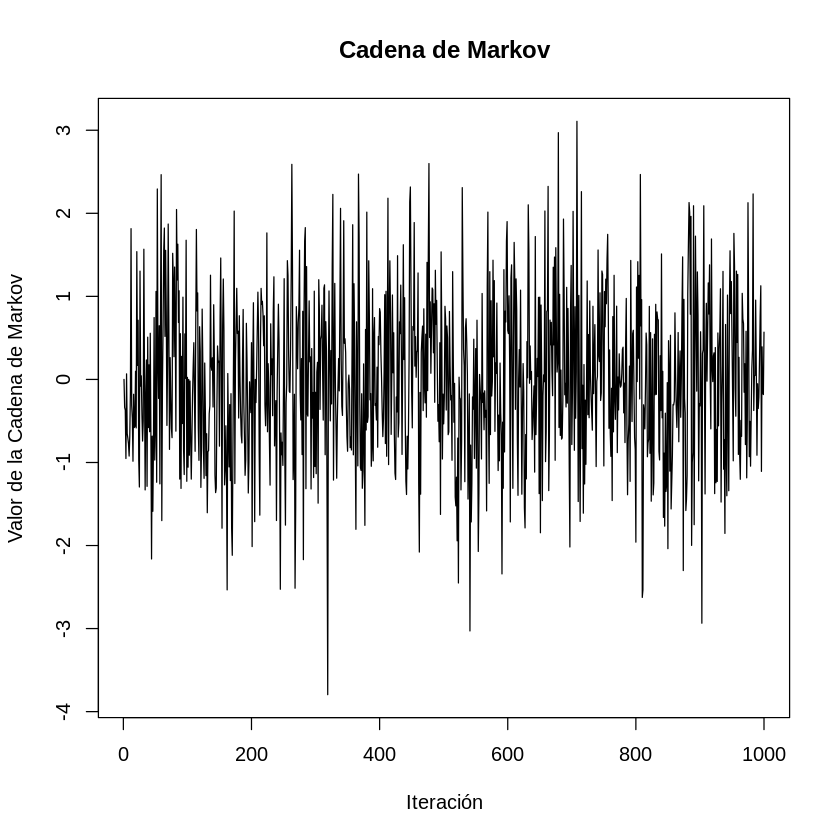

Media de la Cadena de Markov: -0.006252233 
Desviación Estándar de la Cadena de Markov: 0.9832848 
Resultados de los tests de normalidad:
Test de Kolmogorov-Smirnov: 


	Asymptotic two-sample Kolmogorov-Smirnov test

data:  q_markov and normal_sample
D = 0.029, p-value = 0.7944
alternative hypothesis: two-sided


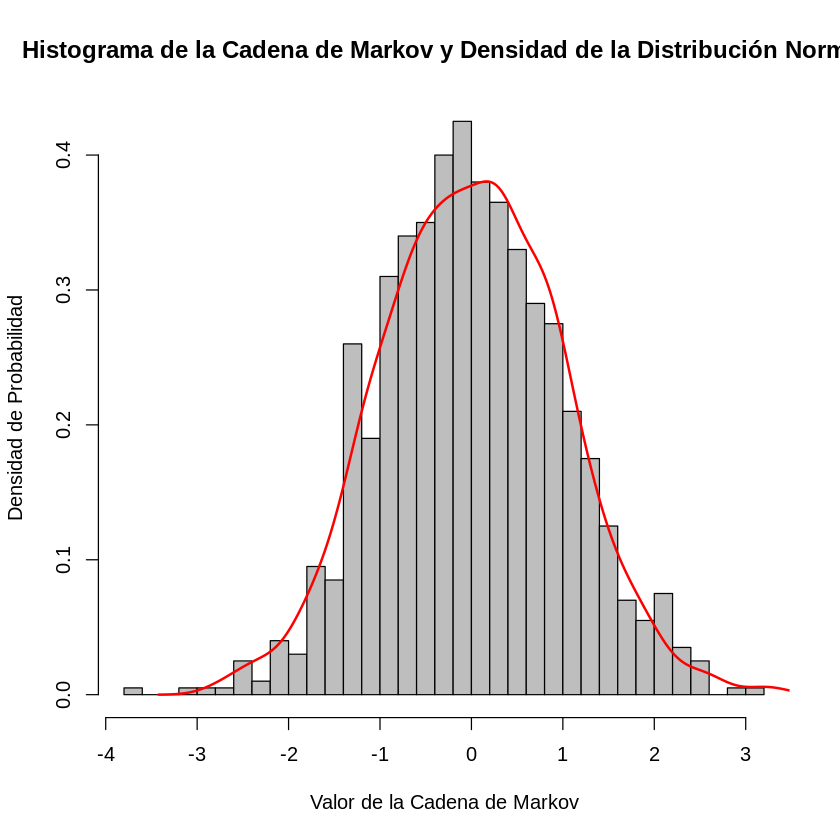

In [113]:
#Cadena de markov q-> x_t = x_t+1*B+e_t
#q(x,y) = q_1(x-y)

N <- 1000
beta <- 0.1
q_c <- function(N, beta) {
  X_T <- 0
  q_markov <- numeric(N)

  for (i in 1:N) {
    q_markov[i] <- X_T
    X_T <- q(X_T, beta)
  }

  return(q_markov)
}

q <- function(X_T, beta) {
  return(beta * X_T + rnorm(1))
  #x_t+1*B+e_t
}

q_markov <- q_c(N, beta)

plot(q_markov, type = "l", xlab = "Iteración", ylab = "Valor de la Cadena de Markov", main = "Cadena de Markov")

normal_sample <- rnorm(N, mean = 0, sd = 1 / sqrt(1 - beta^2))

hist(q_markov, freq = F,breaks = 30, main = "Histograma de la Cadena de Markov y Densidad de la Distribución Normal", xlab = "Valor de la Cadena de Markov", ylab = "Densidad de Probabilidad", col = "gray")
lines(density(normal_sample), col = "red", lwd = 2)

chain_mean <- mean(q_markov)
chain_std <- sd(q_markov)
cat("Media de la Cadena de Markov:", chain_mean, "\n")
cat("Desviación Estándar de la Cadena de Markov:", chain_std, "\n")



cat("Resultados de los tests de normalidad:\n")

cat("Test de Kolmogorov-Smirnov: ")
ks.test(q_markov, normal_sample)

## esta no me da
#cat("Test de Anderson-Darling: ")
#ad.test(q_markov, normal_sample)

#cat("Test de Lilliefors: ")
#lillie.test(q_markov - normal_sample)

#cat("Shapiro Wilk: ")
#mshapiro.test(list(q_markov, normal_sample))

# **Punto 2**

## MCMC
[Vídeo guía](https://www.youtube.com/watch?v=yCv2N7wGDCw)
✅

Necestitamos la función obejetivo, en este caso es f~Beta(2,6)

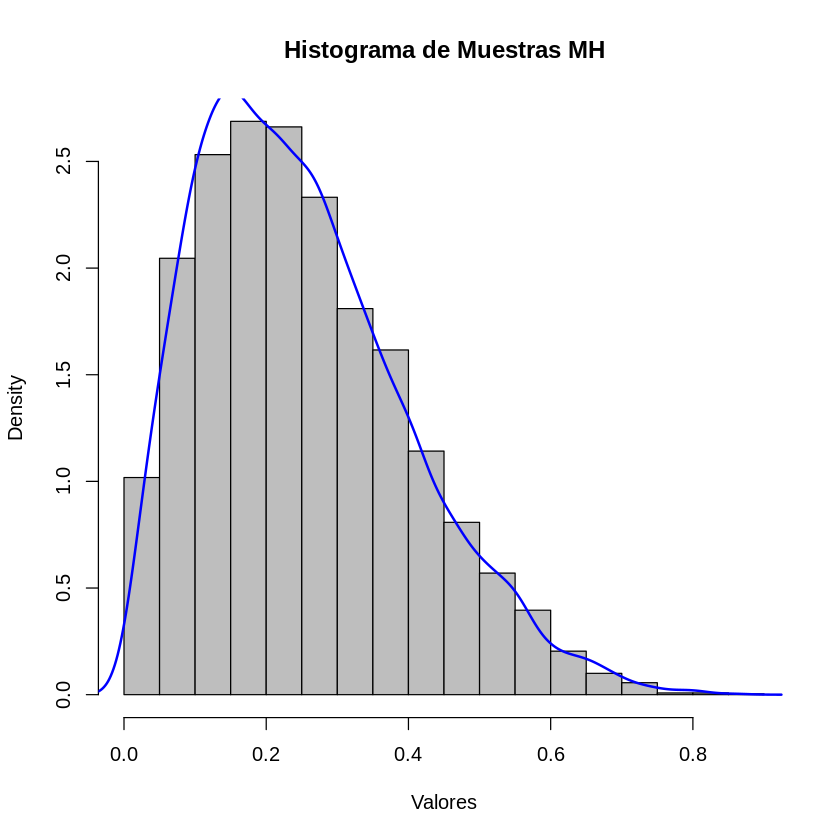

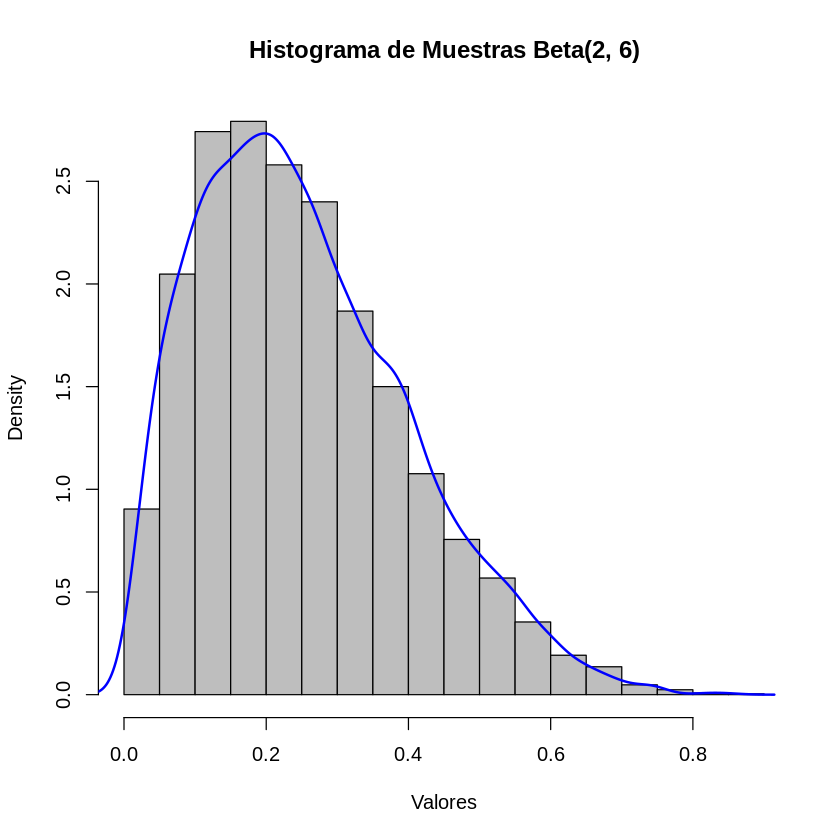

Resultados de los tests de normalidad:
Test de Kolmogorov-Smirnov: 

Warning message in ks.test.default(beta_sample, samples):
“p-value will be approximate in the presence of ties”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  beta_sample and samples
D = 0.0154, p-value = 0.1865
alternative hypothesis: two-sided


Media 0.2504601 
Desviación 0.1454943 
Media muestra MCMC 0.2524158 
Desviación muestra MCMC 0.1465803 


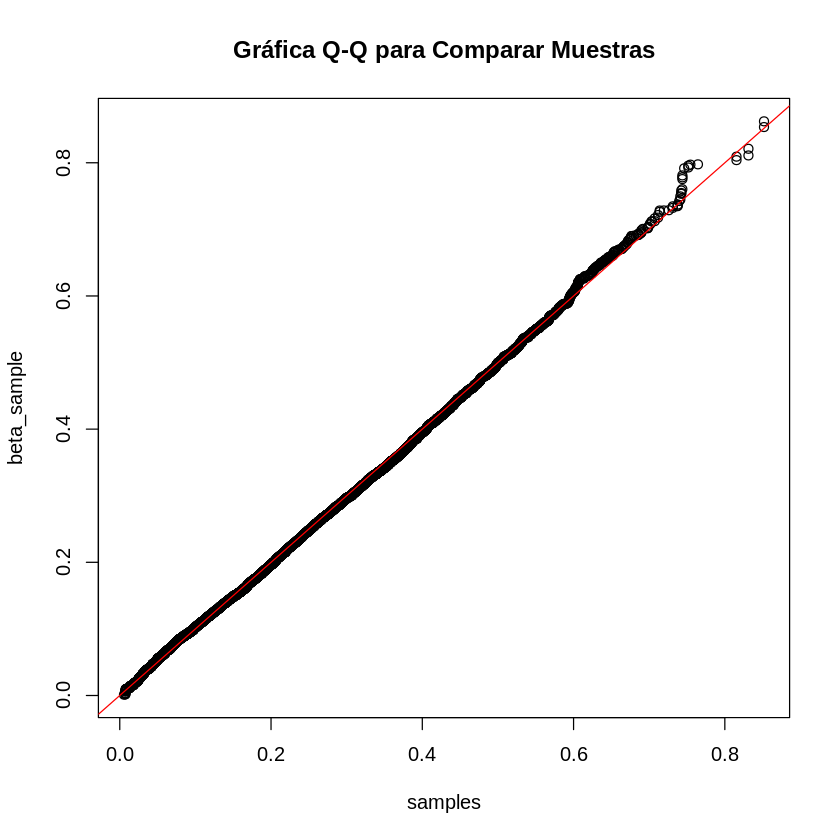

In [114]:
beta_density <- function(x) {
  dbeta(x, shape1 = 2, shape2 = 6)
}

n_iter <- 10000
initial_value <- 0.5
proposal_sd <- 0.1

samples <- numeric(n_iter)
samples[1] <- initial_value

for (i in 2:n_iter) {
  proposal <- rnorm(1, mean = samples[i - 1], sd = proposal_sd)
  acceptance_ratio <- beta_density(proposal) / beta_density(samples[i - 1])

  if (runif(1) < acceptance_ratio) {
    samples[i] <- proposal
  } else {
    samples[i] <- samples[i - 1]
  }
}

beta_sample <- rbeta(n_iter, 2, 6)



hist(samples, breaks = 20,freq = F, main = "Histograma de Muestras MH", xlab = "Valores", col = "gray")
lines(density(beta_sample), col = "blue", lwd = 2)

hist(beta_sample, breaks = 20, freq = F, main = "Histograma de Muestras Beta(2, 6)", xlab = "Valores", col = "gray")
lines(density(samples), col = "blue", lwd = 2)

par(mfrow = c(1, 1))

qqplot(samples, beta_sample, main = "Gráfica Q-Q para Comparar Muestras")
abline(0, 1, col = "red")

cat("Resultados de los tests de normalidad:\n")

cat("Test de Kolmogorov-Smirnov: ")
ks.test(beta_sample, samples)
mu1 = mean(beta_sample)
d1 = sd(beta_sample)
cat("Media", mu1, "\n")
cat("Desviación", d1, "\n")
mu2 =mean(samples)
d2 = sd(samples)
cat("Media muestra MCMC", mu2, "\n")
cat("Desviación muestra MCMC", d2, "\n")


# Punto 3
##  No me da el HM ESTA DANDO UNA MEDIA DIFERENTE O NOC ERCANA A 0.7


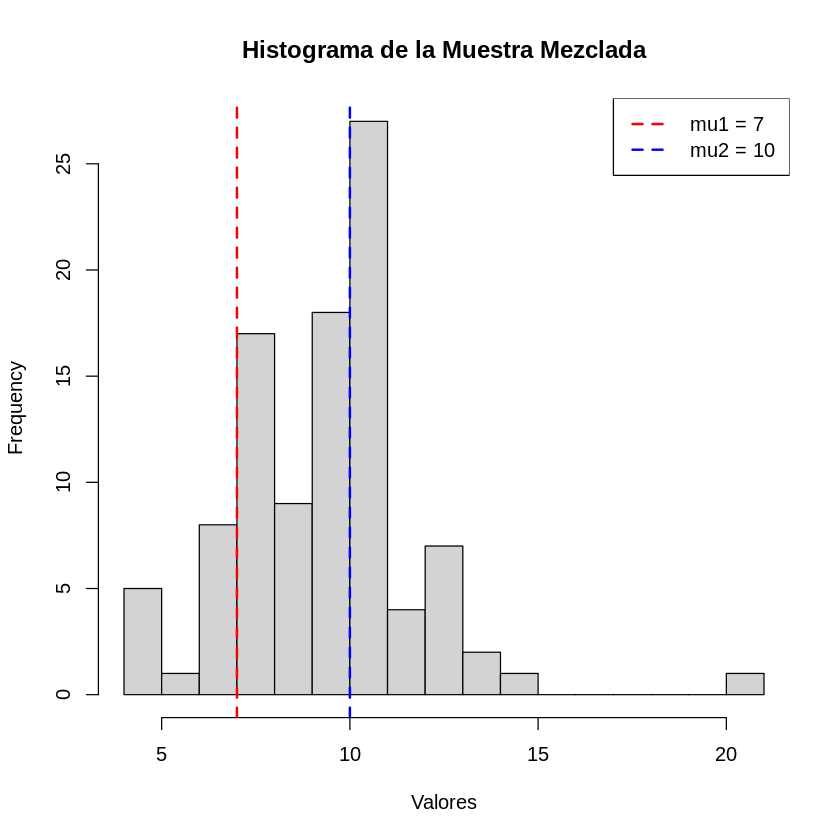

In [115]:
alpha <- 0.7
mu1 <- 7
nu1 <- 3
mu2 <- 10
nu2 <- 3
n <- 100

mixing_probs <- rbinom(n, size = 1, prob = alpha)

sample1 <- rt(n, df = nu1) + mu1
sample2 <- rt(n, df = nu2) + mu2

mixed_sample <- numeric(n)

for (i in 1:n) {
  if (mixing_probs[i] == 0) {
    mixed_sample[i] <- sample1[i]
  } else {
    mixed_sample[i] <- sample2[i]
  }
}

hist(mixed_sample, breaks = 20, main = "Histograma de la Muestra Mezclada", xlab = "Valores")
abline(v = mu1, col = "red", lwd = 2, lty = 2)
abline(v = mu2, col = "blue", lwd = 2, lty = 2)
legend("topright", legend = c(paste("mu1 =", mu1), paste("mu2 =", mu2)), col = c("red", "blue"), lty = 2, lwd = 2)


In [116]:
likelihood <- function(theta, data) {
  alpha <- 0.7
  mu1 <- 7
  nu1 <- 3
  mu2 <- 10
  nu2 <- 3

  likelihood1 <- alpha * dt(data - mu1, df = nu1)
  likelihood2 <- (1 - alpha) * dt(data - mu2, df = nu2)

  return(likelihood1 + likelihood2)
}

prior_beta_1_1 <- function(theta) dbeta(theta, 1, 1)
prior_beta_2_10 <- function(theta) dbeta(theta, 2, 10)

posterior <- function(theta, data, prior) {
  return(likelihood(theta, data) * prior(theta))
}

metropolis_hastings <- function(data, prior, n_iter) {
  theta <- numeric(n_iter)
  theta[1] <- runif(1)

  for (i in 2:n_iter) {
    proposal <- rnorm(1, mean = theta[i - 1], sd = 0.1)
    acceptance_ratio <- posterior(proposal, data, prior) / posterior(theta[i - 1], data, prior)

    acceptance_prob <- min(1, acceptance_ratio)

    if (runif(1) < acceptance_prob) {
      theta[i] <- proposal
    } else {
      theta[i] <- theta[i - 1]
    }
  }

  return(theta)
}


data_simulated <- mixed_sample

set.seed(123)
samples_beta_1_1 <- metropolis_hastings(data_simulated, prior_beta_1_1, n_iter = 10000)

samples_beta_2_10 <- metropolis_hastings(data_simulated, prior_beta_2_10, n_iter = 10000)

expected_theta_beta_1_1 <- mean(samples_beta_1_1)
expected_theta_beta_2_10 <- mean(samples_beta_2_10)

expected_theta_beta_1_1
expected_theta_beta_2_10


[1] 0.4897136

[1] 0.1598542

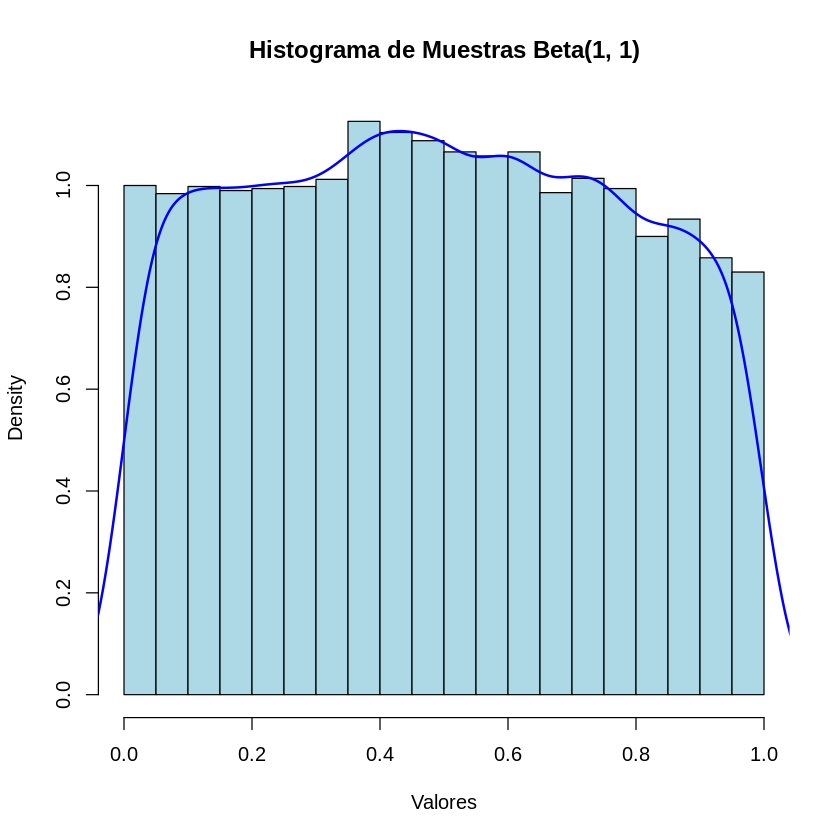

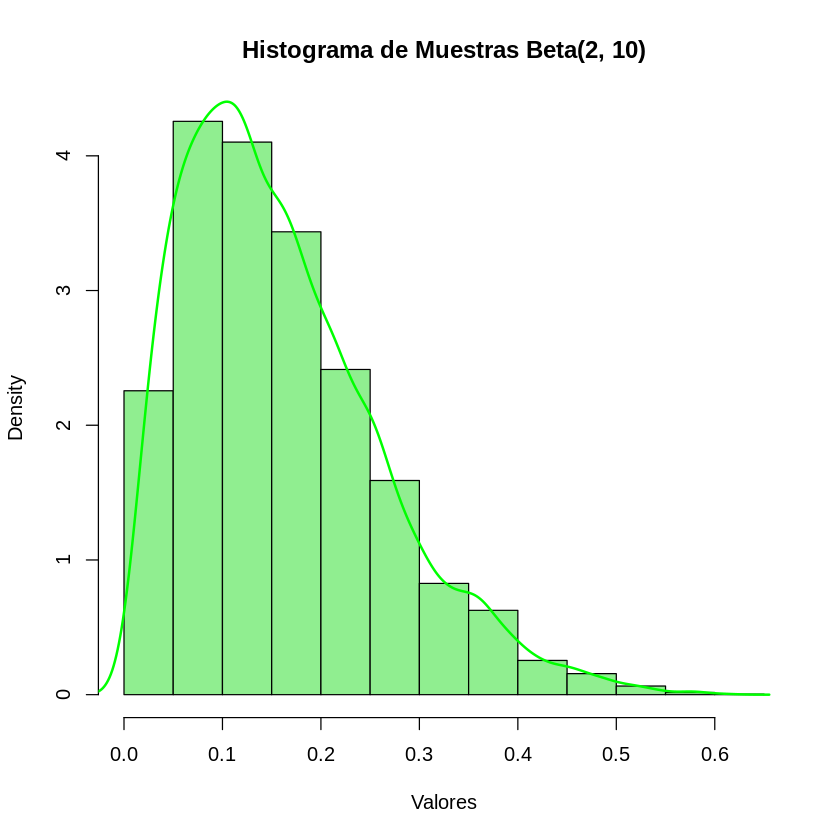

In [117]:
hist(samples_beta_1_1, breaks = 20, main = "Histograma de Muestras Beta(1, 1)", xlab = "Valores", col = "lightblue", freq = FALSE)
lines(density(samples_beta_1_1), col = "blue", lwd = 2)
hist(samples_beta_2_10, breaks = 20, main = "Histograma de Muestras Beta(2, 10)", xlab = "Valores", col = "lightgreen", freq = FALSE)
lines(density(samples_beta_2_10), col = "green", lwd = 2)

# Comparo densidad

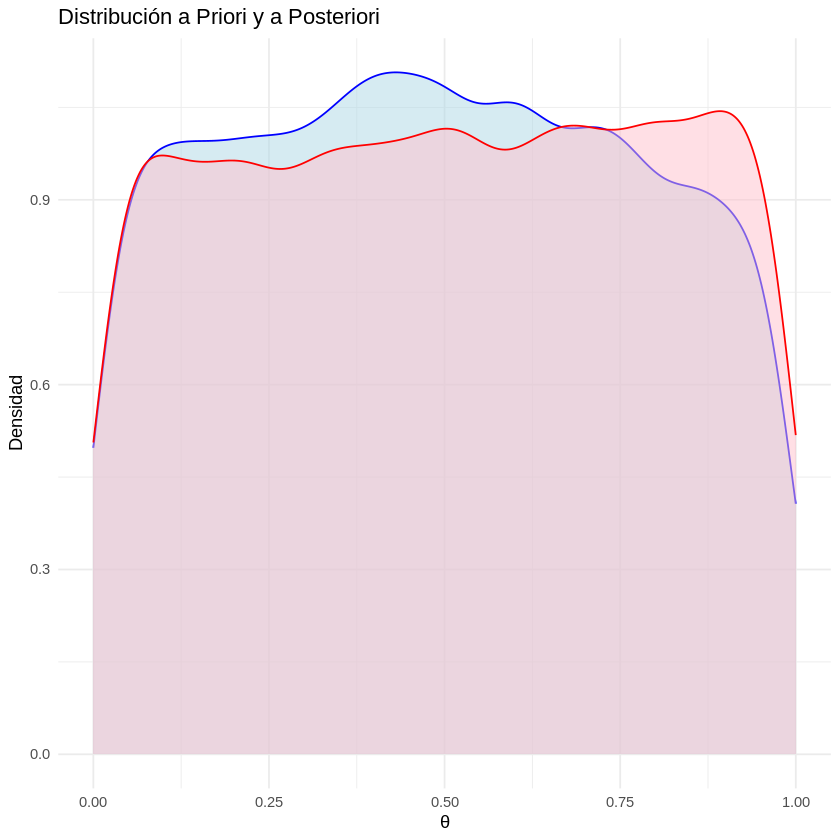

In [118]:
library(ggplot2)
data_simulated <- mixed_sample
set.seed(123)
samples_beta_1_1 <- metropolis_hastings(data_simulated, prior_beta_1_1, n_iter = 10000)

ggplot() +
  geom_density(aes(x = samples_beta_1_1), color = "blue", fill = "lightblue", alpha = 0.5) +
  geom_density(aes(x = rbeta(10000, 1, 1)), color = "red", fill = "pink", alpha = 0.5) +
  labs(title = "Distribución a Priori y a Posteriori",
       x = "θ",
       y = "Densidad") +
  scale_fill_manual(values = c("lightblue", "pink")) +
  scale_color_manual(values = c("blue", "red")) +
  theme_minimal()
